In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [22]:
df_small = pd.read_csv('./transitions.csv')

In [23]:
def transition_matrix(df_small):
    # empty dataframe for tracking
    num_state = len(np.unique(df_small.s))
    num_action = len(np.unique(df_small.a))
    # tracking Rewards for T matrix
    R = np.zeros([num_state, num_action])
    # tracking transition
    N = np.zeros([num_state, num_action, num_state])
    # TN table generation
    for c_state in range(1,num_state+1):
        c_df = df_small[df_small.s == c_state]
        for a in range(1,num_action+1):
            a_df = c_df[c_df.a == a].reset_index(drop=True)
            R[a_df.s[0]-1, a_df.a[0]-1] = a_df.r[0]
            acounts = len(a_df)
            for n_state in np.unique(a_df.sp):
                ncounts = len(a_df[a_df.sp == n_state])
                N[c_state-1, a-1, n_state-1] = ncounts 
                
    # Transition Prob
    T = N/N.sum(axis=-1).reshape(num_state,num_action,1)
    return R, T

In [24]:
R, T = transition_matrix(df_small)

In [26]:
def value_iteration(R, T, gamma=0.95):
    # tracking 
    nstates = T.shape[0]
    U = np.zeros(nstates)
    V = np.zeros(nstates)
    P = np.zeros(nstates)
    # value interation
    while True:
        for i in range(nstates):
            V[i] = np.max((gamma * np.sum((T[i]*U),axis=1) + R[i]))
        diff = ((U-V.flatten())**2).mean()
        U = V.copy()
        if diff < 10**(-10):
            break

    for j in range(nstates):
        P[j] = np.argmax((gamma * np.sum((T[j]*U),axis=1) + R[j]))+1
    print('converged')
    return U, P

In [27]:
U, P = value_iteration(R, T, gamma=0.95)

converged


In [28]:
with open('small.policy', 'w+') as f:
    for i in P:
        f.write(str(int(i))+'\n')

In [29]:
def small_plot(R,U):
    fig = plt.figure(figsize=(10,5))
    gs = gridspec.GridSpec(1, 2, wspace=0.1, hspace=0.1)
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])
    
    initial_grid = R.mean(axis=1).reshape(10,10)
    ax0.imshow(initial_grid)
    ax0.set_title('Initial GridWorld')
    ax1.imshow(U.reshape(10,10))
    ax1.set_title('Value Iteration Result')
    plt.show()
    fig.savefig('./small_res.png', bbox_inches='tight')

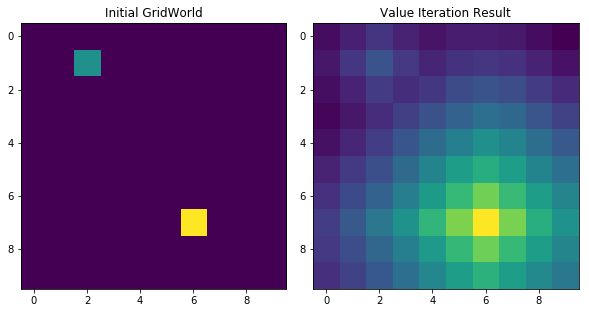

In [30]:
small_plot(R,U)

In [31]:
P.reshape([10,10])

array([[2., 2., 3., 3., 3., 3., 3., 3., 3., 3.],
       [2., 2., 3., 1., 1., 3., 3., 3., 3., 3.],
       [2., 2., 4., 3., 3., 3., 3., 3., 3., 3.],
       [2., 2., 2., 3., 2., 3., 3., 3., 3., 3.],
       [3., 2., 2., 3., 3., 3., 3., 3., 3., 3.],
       [2., 2., 2., 2., 2., 3., 3., 3., 1., 3.],
       [2., 2., 2., 2., 2., 2., 3., 3., 1., 1.],
       [2., 2., 2., 2., 2., 2., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2., 2., 4., 4., 1., 1.],
       [2., 2., 2., 2., 2., 4., 4., 4., 4., 1.]])